# Program - plot cn_map using cartopy

**Purpose**


**Content**
- read TaiESM1 and CERES data
- using an xarray function, interp_like, to interpolate data on one lat/lon grid to another lat/lon grid
- plot cn_map using cartopy

**Author:** Yi-Hsuan Chen (yihsuan@umich.edu)

**Date:** May 24, 2023

**Reference program:**

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.util as cutil
import cartopy.mpl.ticker as cticker
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import xarray as xr
import io, os, sys, types

import yhc_module as yhc
import read_data as read_data

xr.set_options(keep_attrs=True)  # keep attributes after xarray operation

ERROR 1: PROJ: proj_create_from_database: Open of /lfs/opt/anaconda3/share/proj failed


<xarray.Dataset>
Dimensions:                     (lon: 360, lat: 180, time: 168)
Coordinates:
  * lon                         (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * lat                         (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
  * time                        (time) datetime64[ns] 2001-01-15 ... 2014-12-15
Data variables:
    toa_sw_all_mon              (time, lat, lon) float32 dask.array<chunksize=(168, 180, 360), meta=np.ndarray>
    toa_lw_all_mon              (time, lat, lon) float32 dask.array<chunksize=(168, 180, 360), meta=np.ndarray>
    toa_net_all_mon             (time, lat, lon) float32 dask.array<chunksize=(168, 180, 360), meta=np.ndarray>
    toa_sw_clr_c_mon            (time, lat, lon) float32 dask.array<chunksize=(168, 180, 360), meta=np.ndarray>
    toa_lw_clr_c_mon            (time, lat, lon) float32 dask.array<chunksize=(168, 180, 360), meta=np.ndarray>
    toa_net_clr_c_mon           (time, lat, lon) float32 dask.array<chunksize=(168, 180, 360

## Read data

### TaiESM1

In [2]:
choice = "rsut_Amon_TaiESM1_amip-hist_r1i1p1f1_1979_2014"
ds_TaiESM1 = read_data.read_TaiESM_data(choice)
#ds_TaiESM1

rsut_TaiESM1_mean = ds_TaiESM1.rsut.mean("time")

In [3]:
choice = "rlut_Amon_TaiESM1_amip-hist_r1i1p1f1_1979_2014"
ds_TaiESM1 = read_data.read_TaiESM_data(choice)
#ds_TaiESM1

rlut_TaiESM1_mean = ds_TaiESM1.rlut.mean("time")

In [4]:
choice = "rsut_Amon_TaiESM1_historical_r1i1p1f1_gn_185001-201412"
ds_TaiESM1_hist = read_data.read_TaiESM_data(choice)
rsut_TaiESM1_hist_mean = ds_TaiESM1_hist.rsut.mean("time")

### CERES
#### Interpolate CERES data on TaiESM grid
- using xarray, interp_like
- https://docs.xarray.dev/en/stable/generated/xarray.DataArray.interp_like.html
- the source_data and target_data better are (lat, lon), no time dimension

In [5]:
choice = "CERES_EBAF-TOA_Ed4.2_Subset_200101-201412"
ds_ceres = read_data.read_CERES_data(choice)
ds_ceres

#--- interpolation
sw_all_CERES_mean = ds_ceres.toa_sw_all_mon.mean("time").interp_like(rsut_TaiESM1_mean, kwargs={"fill_value": "extrapolate"})
lw_all_CERES_mean = ds_ceres.toa_lw_all_mon.mean("time").interp_like(rsut_TaiESM1_mean, kwargs={"fill_value": "extrapolate"})


## Define plotting function

### add_lon_cyclic

In [6]:
#--- add a cyclic point in lon, otherwise, there will be a white line at the edge
def add_lon_cyclic(var): 
    var_return, lon_cyclic = cutil.add_cyclic_point(var, coord=var.lon)  

    return var_return, lon_cyclic

#-----------
# do_test
#-----------

#do_test=True
do_test=False

if (do_test):
    sw_all_CERES_mean_plot, lon_CERES = add_lon_cyclic(sw_all_CERES_mean)


### cn_attrs

In [7]:
def cn_attrs(varname, var):

    #--- 
    if (varname == "TOA_SW"):
        cn_levels = 15
        cmap="viridis"
        #long_name = var.standard_name
        long_name = "TOA outgoing SW flux"
        units = var.units
        cbar_label = long_name+" ("+units+")"

    elif (varname == "TOA_SW_diff"):
        cn_levels = np.array([-50, -40, -30, -20, -15, -10, -5, 0, 
                                 5, 10, 15, 20, 30, 40, 50])
        cmap="seismic_r"
        #long_name = var.standard_name
        long_name = "TOA outgoing SW flux diff"
        units = var.units
        cbar_label = long_name+" ("+units+")"
        
    else:
        cn_levels = 15
        cmap = "viridis"
        cbar_label = "Var (units)"
        long_name = "var"
        units="N/A"
    
    return cn_levels, cmap, long_name, units, cbar_label

#----------
# do test
#----------

#do_test=True
do_test=False

if (do_test):
    
    varname = "TOA_SW"
    var_tmp = xr.DataArray(1)
    var_tmp.attrs['standard_name']="ggg"
    var_tmp.attrs['units']="KK"
    cn_levels, cmap, long_name, units, cbar_label = cn_attrs(varname, var=var_tmp)
    
    print(long_name)

In [8]:
yhc.lib("dict")



    #-------------------------
    # Python disctionary
    #-------------------------  
    
    #--- set a dictionary 
    dict = {
        "u": ["long_name=eastward_wind", "units=m s-1"],
        "v": ["long_name=northward_wind", "units=m s-1"],
    }
    
    #--- look up the dictionary  
    print(dict['u'])
    
    #--- if statement for a dictionary  
    if var1 in dict:
        attrs_var = dict['u']
    else:
        dict_keys = list(dict.keys())   # get all keys in the dict
    


### plot_location_dots

In [9]:
def plot_location_dots(ax, map_projection, loc,
                       s=4, c='cyan'):
    
    func_name = "plot_location_dots"
    
    if (loc == "DYCOMS"):
        lat = np.array([31])
        lon = np.array([238])
    elif (loc == "VOCALS-REx_20S"):
        lat = -20
        #lon = np.arange(62.5, 97.5, 2.5)
        #lon = 360 - np.array([62.5, 65., 67.25, 70, 72.5, 75., 77.25, 80,  82.5, 85, 87.25, 90., 92.5, 95.])
        lon = 360 - np.array([70, 72.5, 75., 77.25, 80,  82.5, 85])
    else:
        error_msg = f"ERROR: function [{func_name}] does not support [{loc}]."
        raise ValueError(error_msg)
        
    for lon1 in lon:
        #ax.plot(lon1, lat, marker=marker, markersize=markersize, color=color)
        ax.scatter(lon1, lat, c=c, s=s, transform=map_projection)

        #print(lat+" , "+lon1)
        #print(lon1)
        
    #return lat, lon

#-----------
# do_test
#-----------

#do_test=True
do_test=False

if (do_test):
    
    map_projection = ccrs.PlateCarree(central_longitude=0)
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=map_projection)
    title = "CERES"
    plot_cn_map (ax, map_projection, var = sw_all_CERES_mean, varname = "TOA_SW", title = "CERES")
    
    
    #loc = "VOCALS-REx_20S"
    loc = "DYCOMS"
    #lat, lon = plot_location_dots(ax, loc)
    #print(lat)
    #print(lon)
    plot_location_dots(ax, map_projection, loc)
   

### plot_box

In [15]:
def plot_box(ax, region="DYCOMS"):
    
    if (region == "DYCOMS"): 
        #--- reference: Eyeballing in Fig. 1 in Stevens et al. (2007, MWR)
        region_name = "DYCOMS (29.5-33N, 120-123.5W)"
        lowerlat =  29.5   # 29.5N
        upperlat =  33     # 33N
        lowerlon =  236.5  # 123.5W
        upperlon =  240    # 120W
    
    lon_range = upperlon - lowerlon
    lat_range = upperlat - lowerlat

    rect = mpatches.Rectangle((lowerlon, lowerlat), lon_range, lat_range, facecolor='none', edgecolor='cyan', linewidth=2, transform=map_projection)
    ax.add_patch(rect)

### plot_cn_map

In [10]:
def plot_cn_map(ax, map_projection,
                var, varname, title, 
                cmap = "viridis", orientation='horizontal', label='Some units', shrink = 0.9, pad=0.05,
                do_add_lon_cyclic = True,
                ): 
    
    """
    ----------------------
    Description:


    Input arguments:


    Return:


    Example:
      import yhc_module as yhc
       = yhc.()

    Date created: 2023-05-25
    ----------------------
    """


    func_name = ""

    #--- adding a cyclic point in lon
    if (do_add_lon_cyclic): 
        var_plot, lon_plot = add_lon_cyclic(var)
    else:
        var_plot = var.copy()
        lon_plot = var_plot.lon
    
    #--- plot cn_map & a colorbar
    cn_levels, cmap, long_name, units, cbar_label = cn_attrs(varname = varname, var=var)
    cn_map_var = ax.contourf(lon_plot, var.lat, var_plot, levels = cn_levels, cmap=cmap, transform=map_projection)
   
    #--- add coast lines
    ax.add_feature(cfeature.COASTLINE)
    #ax.add_feature(cfeature.BORDERS)
    ax.set_global()

    #--- add grid lines
    gl = ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha = 0)  # add lat/lon grid lines

    # turn off labels on the top and right sides
    gl.top_labels = False
    gl.right_labels = False

    #--- add texts
    ax.set_title(title, y=1.1,  fontweight='bold')
    
    left_string = long_name
    right_string = units
    cbar_label = left_string+" ("+right_string+")"
    
    ax.set_title(left_string, loc='left')
    ax.set_title(right_string, loc='right')

    #--- plot colorbar
    if (isinstance(cn_levels, int)):
        cbar = plt.colorbar(cn_map_var, ax=ax, orientation=orientation, shrink=shrink, label=cbar_label, pad=pad)
    else:
        cbar = plt.colorbar(cn_map_var, ax=ax, orientation=orientation, shrink=shrink, label=cbar_label, ticks=cn_levels, pad=pad )

    
    return
    
    
#-----------
# do_test
#-----------

#do_test=True
do_test=False

if (do_test):
    map_projection = ccrs.PlateCarree(central_longitude=0)
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=map_projection)
    title = "CERES"
    
    plot_cn_map (ax, map_projection, var = sw_all_CERES_mean, varname = "TOA_SW", title = "CERES")
    #plot_cn_map (ax, map_projection, var = rsut_TaiESM1_mean, title = "TaiESM1")
    
    #var_TaiESMmCERES = rsut_TaiESM1_mean - sw_all_CERES_mean
    #plot_cn_map (ax, map_projection, var = var_TaiESMmCERES, varname = "TOA_SW_diff", title = "TaiESM1 - CERES")


## Plot

### TOA outgoing SW flux

In [11]:
#yhc.lib('plt_basic')

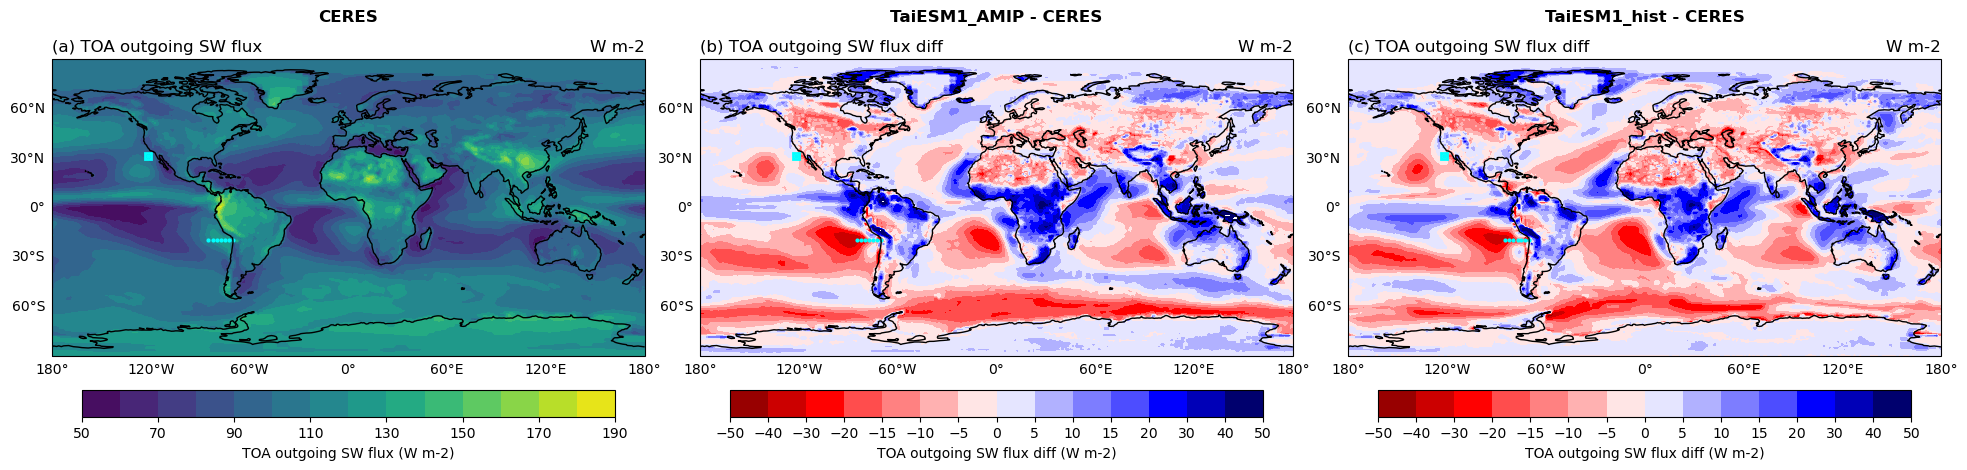

In [17]:
map_projection = ccrs.PlateCarree(central_longitude=0)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 8), subplot_kw={'projection': map_projection})   # 2 row, 1 column
#fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(12, 16), subplot_kw={'projection': map_projection})   # 2 row, 1 column
fig.tight_layout(pad=4)

#--- CERES
plot_cn_map (ax1, map_projection, var = sw_all_CERES_mean, varname = "TOA_SW", title = "CERES")

#--- TaiESM1 - CERES
var_TaiESMmCERES = rsut_TaiESM1_mean - sw_all_CERES_mean
plot_cn_map (ax2, map_projection, var = var_TaiESMmCERES, varname = "TOA_SW_diff", title = "TaiESM1_AMIP - CERES")

#--- TaiESM1_hist - CERES
var_TaiESM_histmCERES = rsut_TaiESM1_hist_mean - sw_all_CERES_mean
plot_cn_map (ax3, map_projection, var = var_TaiESM_histmCERES, varname = "TOA_SW_diff", title = "TaiESM1_hist - CERES")

c_dycoms = "cyan"
plot_location_dots(ax1, map_projection, c=c_dycoms, loc = "DYCOMS")
plot_location_dots(ax2, map_projection, c=c_dycoms, loc = "DYCOMS")
plot_location_dots(ax3, map_projection, c=c_dycoms, loc = "DYCOMS")

plot_location_dots(ax1, map_projection, loc = "VOCALS-REx_20S")
plot_location_dots(ax2, map_projection, loc = "VOCALS-REx_20S")
plot_location_dots(ax3, map_projection, loc = "VOCALS-REx_20S")

ax1.set_title('(a) TOA outgoing SW flux', loc='left')
ax2.set_title('(b) TOA outgoing SW flux diff', loc='left')
ax3.set_title('(c) TOA outgoing SW flux diff', loc='left')

plot_box(ax1)
plot_box(ax2)
plot_box(ax3)


### TOA outgoing LW flux


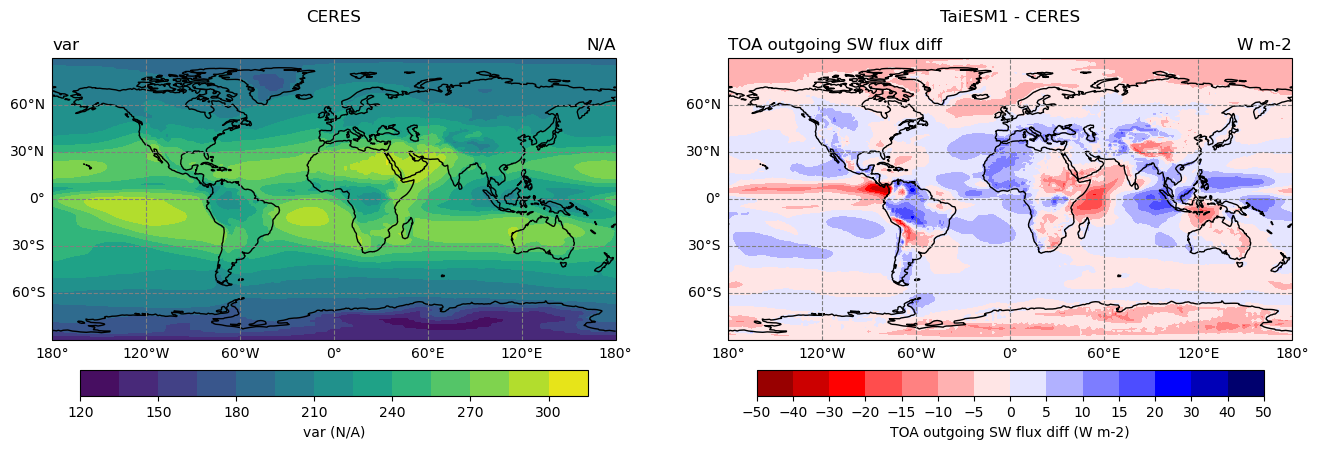

In [13]:
map_projection = ccrs.PlateCarree(central_longitude=0)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 8), subplot_kw={'projection': map_projection})   # 2 row, 1 column

#--- CERES
plot_cn_map (ax1, map_projection, var = lw_all_CERES_mean, varname = "TOA_LW", title = "CERES")

#--- TaiESM1 - CERES
var_TaiESMmCERES = rlut_TaiESM1_mean - lw_all_CERES_mean
plot_cn_map (ax2, map_projection, var = var_TaiESMmCERES, varname = "TOA_SW_diff", title = "TaiESM1 - CERES")
